In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [11]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [17]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv = 10,scoring = 'accuracy'))

0.6289123630672926

In [28]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')

In [29]:
trf = ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare,[1])])

In [30]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [31]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [32]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [33]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [34]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
398,23.0,5.0,10.5000,0.0,"(21.0, 23.0]","(0.0, 11.241]"
696,44.0,12.0,8.0500,0.0,"(42.0, 47.0]","(0.0, 11.241]"
528,39.0,11.0,7.9250,0.0,"(38.0, 42.0]","(0.0, 11.241]"
637,31.0,8.0,26.2500,2.0,"(30.0, 32.0]","(19.869, 28.065]"
838,32.0,9.0,56.4958,5.0,"(30.0, 32.0]","(45.738, 59.337]"


In [35]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [36]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [40]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6359154929577464

In [41]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6331377151799688


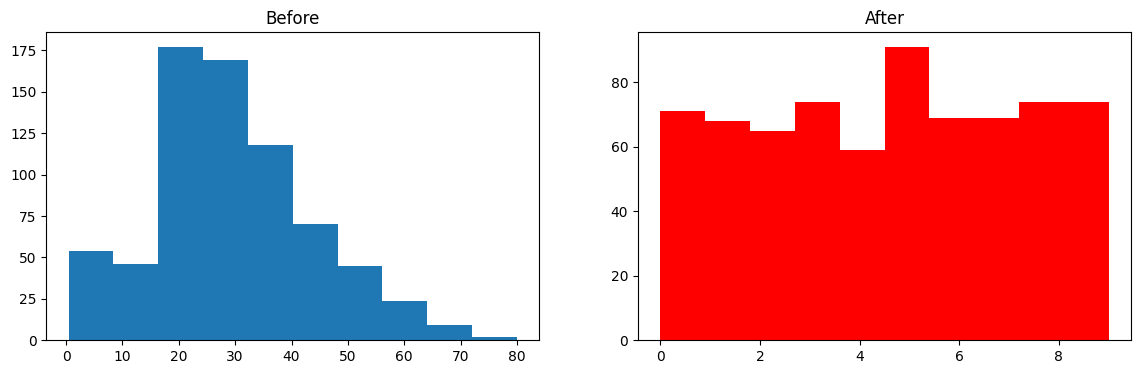

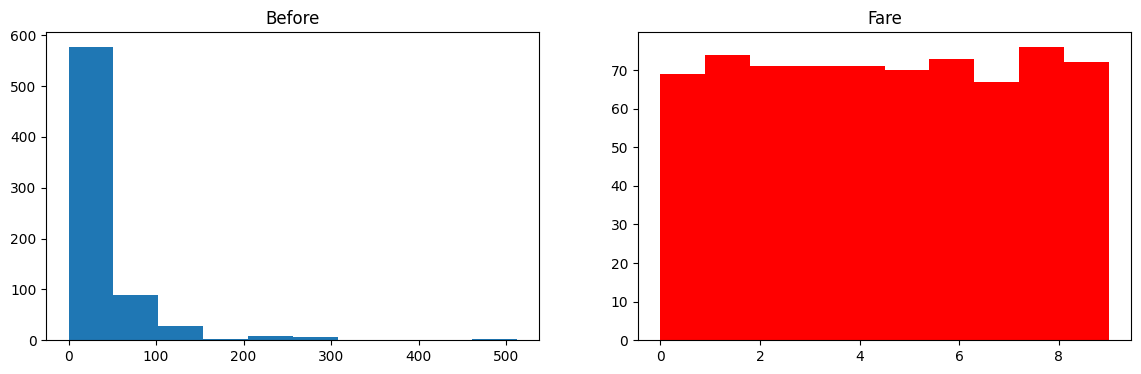

In [42]:
discretize(10,'quantile')

0.6218896713615023


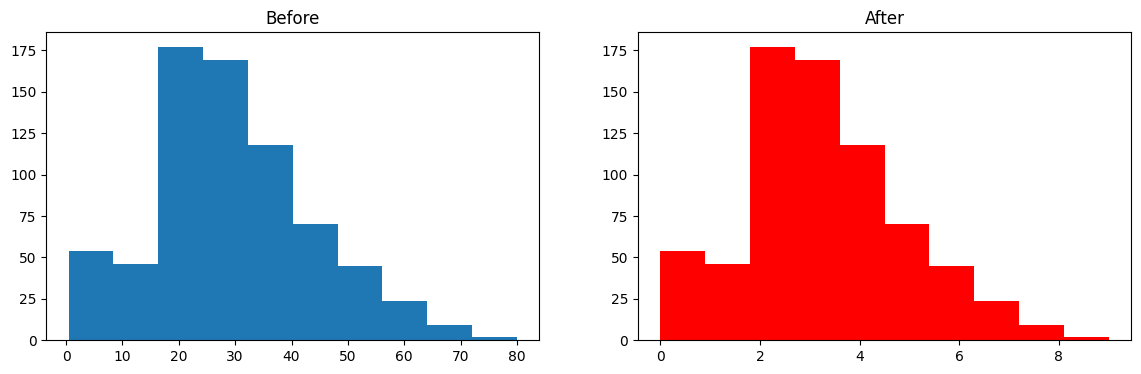

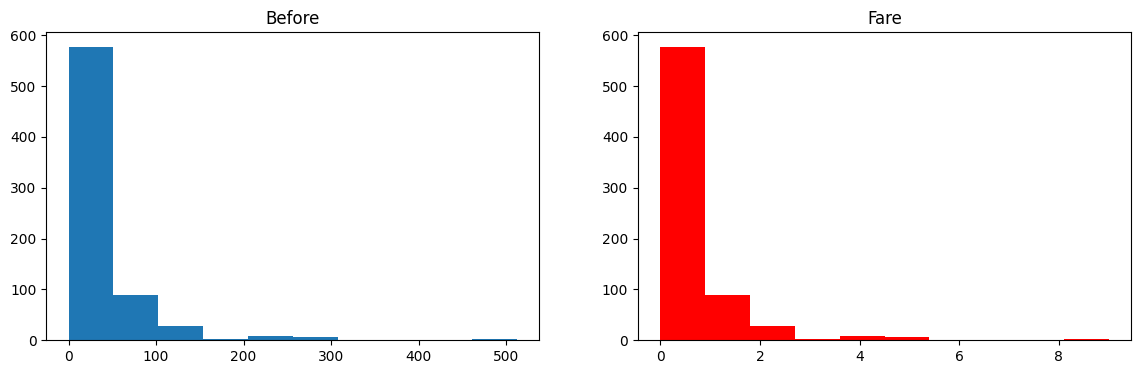

In [43]:
discretize(10,'uniform')

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
